# DEFINITION OF FUNCTIONS

In [1]:
# Functions to save and load variables/data

def pickle_save(name, path, data, verbose=True):
    if not os.path.exists(path):
        os.makedirs(path)
    full_name = (os.path.join(path,name+ '.npy'))


    with open(full_name, 'wb') as f2:
        pickle.dump(data, f2)
    if verbose:
        print('saved at : ',full_name)

def pickle_load(name, path, verbose=True):
    #if not os.path.exists(path):
    #    os.makedirs(path)
    full_name= (os.path.join(path,name+ '.npy'))

    with open(full_name, 'r') as f:
        data=pickle.load(f)

    if verbose:
        print('loaded from : ',full_name)
    return data

In [2]:
def merc_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(12,12))
        m       = Basemap(projection='merc',llcrnrlat=-80.,urcrnrlat=-30.,\
                  llcrnrlon=150.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
        #m       = Basemap(llcrnrlon=lon[0],llcrnrlat=-70.,urcrnrlon=lon[-1],urcrnrlat=lat[-1],\
        #          rsphere=(6378137.00,6356752.3142),\
        #          resolution='l',area_thresh=1000.,projection='lcc',\
        #          lat_1=-70.,lon_0=-185.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(150.,270.,10), labels=[0, 0, 0, 1])
        m.drawcoastlines()



        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

***

# PACKAGES

In [3]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

***

# Potential temperature

In [4]:
# Load variables
mean_Theta_surf = pickle_load('mean_Theta_surf_2', '/data/ebent')
mean_Theta_30 = pickle_load('mean_Theta_30_2', '/data/ebent')
mean_Theta_100 = pickle_load('mean_Theta_100_2', '/data/ebent')
mean_Theta_200 = pickle_load('mean_Theta_200_2', '/data/ebent')
mean_Theta_500 = pickle_load('mean_Theta_500_2', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Theta_surf_2.npy')
('loaded from : ', '/data/ebent/mean_Theta_30_2.npy')
('loaded from : ', '/data/ebent/mean_Theta_100_2.npy')
('loaded from : ', '/data/ebent/mean_Theta_200_2.npy')
('loaded from : ', '/data/ebent/mean_Theta_500_2.npy')


In [4]:
# Load packages
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Theta.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Theta.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Theta.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Theta.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Theta.nc','r')

In [6]:
file1.variables.keys()

[u'time', u'lat', u'lon', u'depth', u'Theta']

***

#### This is the min and max for what I call the bigger domain which is the domain I use in Octopus

In [5]:
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

In [6]:
lat = file1.variables['lat'][:]
lon = file1.variables['lon'][:]

In [7]:
print(lon[lon_min], lon[lon_max], lat[lat_min], lat[lat_max])

(120.04166412353516, 270.125, -77.9913330078125, -39.992000579833984)


In [8]:
lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat) 

In [22]:
Lon.shape # this is the shape I want for my study of particles

(1024, 1801)

***

#### This is the min and max for the validation of the model

In [5]:
# Select a specific region
lon_min = 1800
lon_max = 3240
lat_min = 0
lat_max = 1170

In [6]:
lat = file1.variables['lat'][:]
lon = file1.variables['lon'][:]

In [7]:
lat[0], lat[1170]

(-77.9913330078125, -30.053228378295898)

In [8]:
print(lon[lon_min], lon[lon_max], lat[lat_min], lat[lat_max])

(150.04167175292969, 270.04165649414062, -77.9913330078125, -30.053228378295898)


In [9]:
lat = file1.variables['lat'][lat_min:lat_max]
lon = file1.variables['lon'][lon_min:lon_max]
Lon, Lat = np.meshgrid(lon,lat) 

In [10]:
Lon.shape # this is the shape I want for my validation of model

(1170, 1440)

***

In [11]:
depth = file1.variables['depth'][:]
surf = depth[0]
depth_100 = depth[24]
depth_200 = depth[39]
print(surf, depth_100, depth_200)

(1.0, 102.5, 205.0)


In [12]:
time = file1.variables['time'][:]

In [13]:
time.shape

(73,)

In [15]:
index_DJF = np.append(np.arange(12), np.arange(67,73))

In [16]:
index_DJF

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 67, 68, 69, 70, 71,
       72])

In [17]:
time[index_DJF]

array([732680.5, 732685.5, 732690.5, 732695.5, 732700.5, 732705.5,
       732710.5, 732715.5, 732720.5, 732725.5, 732730.5, 732735.5,
       733015.5, 733020.5, 733025.5, 733030.5, 733035.5, 733040.5])

In [18]:
index_JJA = np.arange(30,49)

In [19]:
index_JJA

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48])

In [20]:
time[index_JJA]

array([732830.5, 732835.5, 732840.5, 732845.5, 732850.5, 732855.5,
       732860.5, 732865.5, 732870.5, 732875.5, 732880.5, 732885.5,
       732890.5, 732895.5, 732900.5, 732905.5, 732910.5, 732915.5,
       732920.5])

In [21]:
time

array([732680.5, 732685.5, 732690.5, 732695.5, 732700.5, 732705.5,
       732710.5, 732715.5, 732720.5, 732725.5, 732730.5, 732735.5,
       732740.5, 732745.5, 732750.5, 732755.5, 732760.5, 732765.5,
       732770.5, 732775.5, 732780.5, 732785.5, 732790.5, 732795.5,
       732800.5, 732805.5, 732810.5, 732815.5, 732820.5, 732825.5,
       732830.5, 732835.5, 732840.5, 732845.5, 732850.5, 732855.5,
       732860.5, 732865.5, 732870.5, 732875.5, 732880.5, 732885.5,
       732890.5, 732895.5, 732900.5, 732905.5, 732910.5, 732915.5,
       732920.5, 732925.5, 732930.5, 732935.5, 732940.5, 732945.5,
       732950.5, 732955.5, 732960.5, 732965.5, 732970.5, 732975.5,
       732980.5, 732985.5, 732990.5, 732995.5, 733000.5, 733005.5,
       733010.5, 733015.5, 733020.5, 733025.5, 733030.5, 733035.5,
       733040.5])

## Surface

In [23]:
mean_Theta_surf= (np.ma.mean(file1.variables['Theta'][19:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,0,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [27]:
pickle_save('mean_Theta_surf_2', '/data/ebent/Bigger_domain/', mean_Theta_surf)

('saved at : ', '/data/ebent/Bigger_domain/mean_Theta_surf_2.npy')


In [16]:
print(mean_Theta_surf.min(), mean_Theta_surf.max(), np.mean(mean_Theta_surf))

(-1.9383443495950896, 24.537801360284352, 5.0783240669917884)


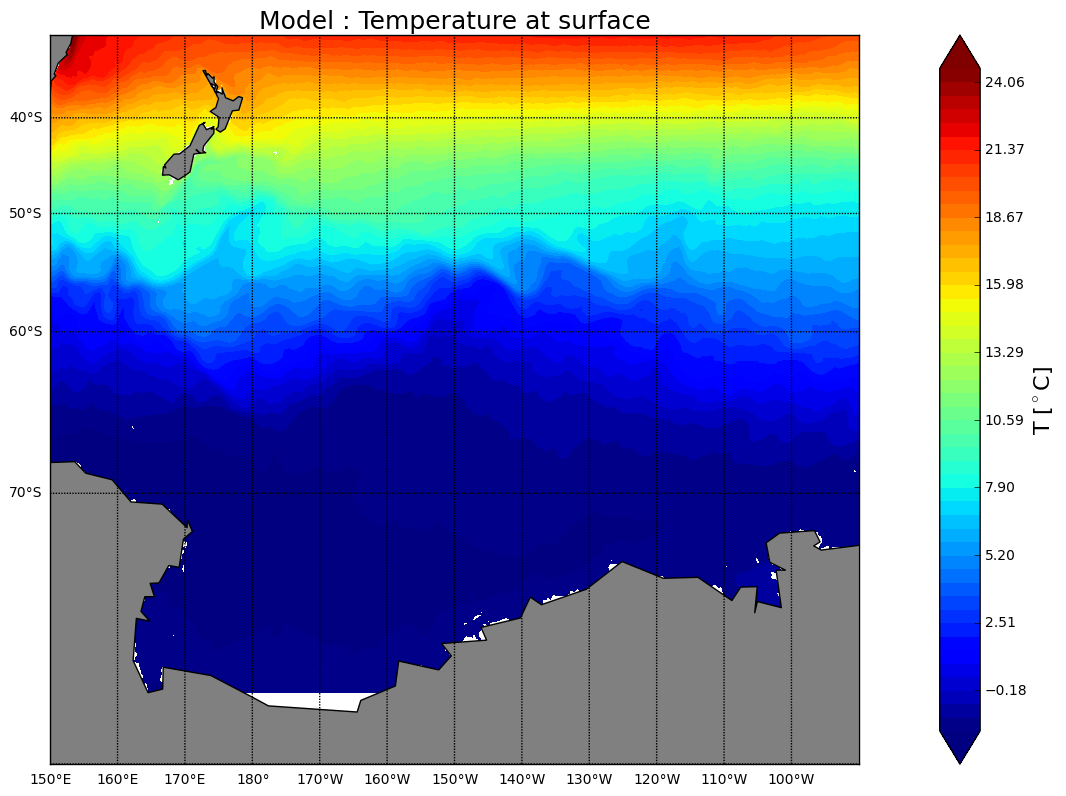

In [17]:
merc_map(np.linspace(-1.8,24.6,50), Lon, Lat, mean_Theta_surf, 'Model : Temperature at surface', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'thetasurf2_jup.png')

## 30 m

In [11]:
mean_Theta_30= (np.ma.mean(file1.variables['Theta'][19:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,9,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [12]:
pickle_save('mean_Theta_30_2', '/data/ebent/Bigger_domain/', mean_Theta_30)

('saved at : ', '/data/ebent/Bigger_domain/mean_Theta_30_2.npy')


In [16]:
print(mean_Theta_30.min(), mean_Theta_30.max(), np.mean(mean_Theta_30))

(-1.93924653312387, 24.494112290095615, 4.9678928899639798)


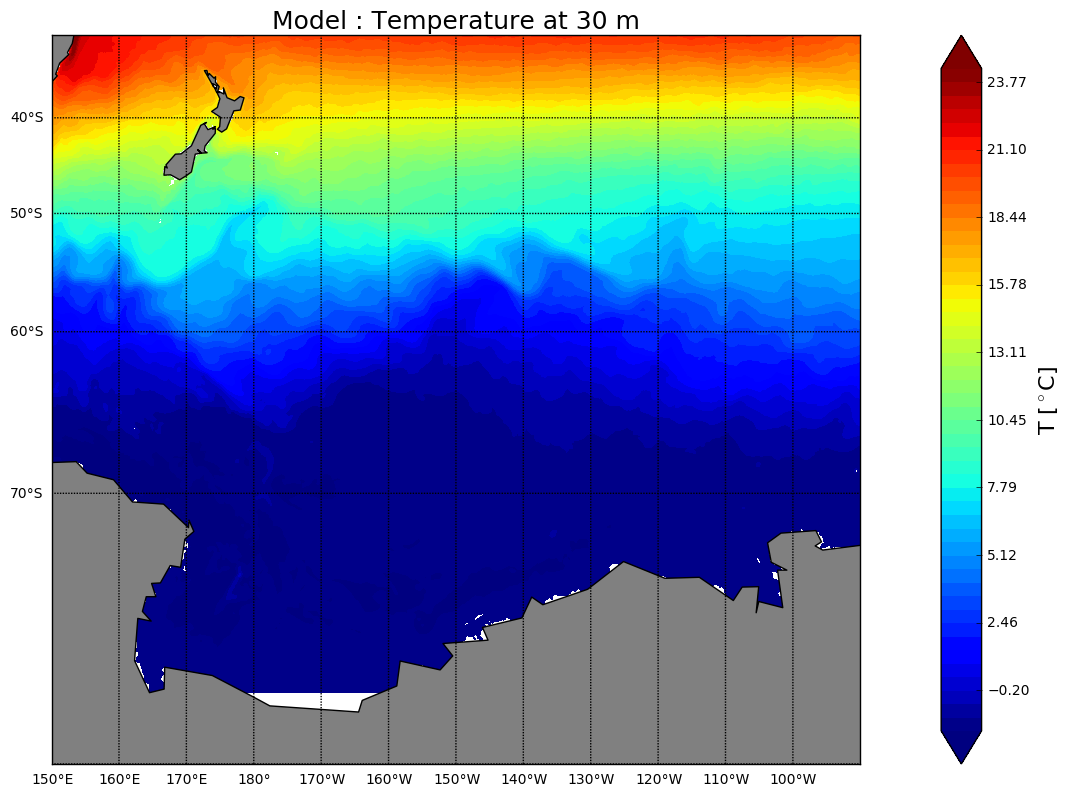

In [28]:
merc_map(np.linspace(-1.8,24.3,50), Lon, Lat, mean_Theta_30, 'Model : Temperature at 30 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta30_2_jup.png')

## 100 m deep

In [28]:
mean_Theta_100= (np.ma.mean(file1.variables['Theta'][19:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,24,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [29]:
pickle_save('mean_Theta_100_2', '/data/ebent/Bigger_domain/', mean_Theta_100)

('saved at : ', '/data/ebent/Bigger_domain/mean_Theta_100_2.npy')


In [29]:
print(mean_Theta_100.min(), mean_Theta_100.max(), np.mean(mean_Theta_100))

(-1.9161330235356491, 22.487370340379769, 4.7355004567394134)


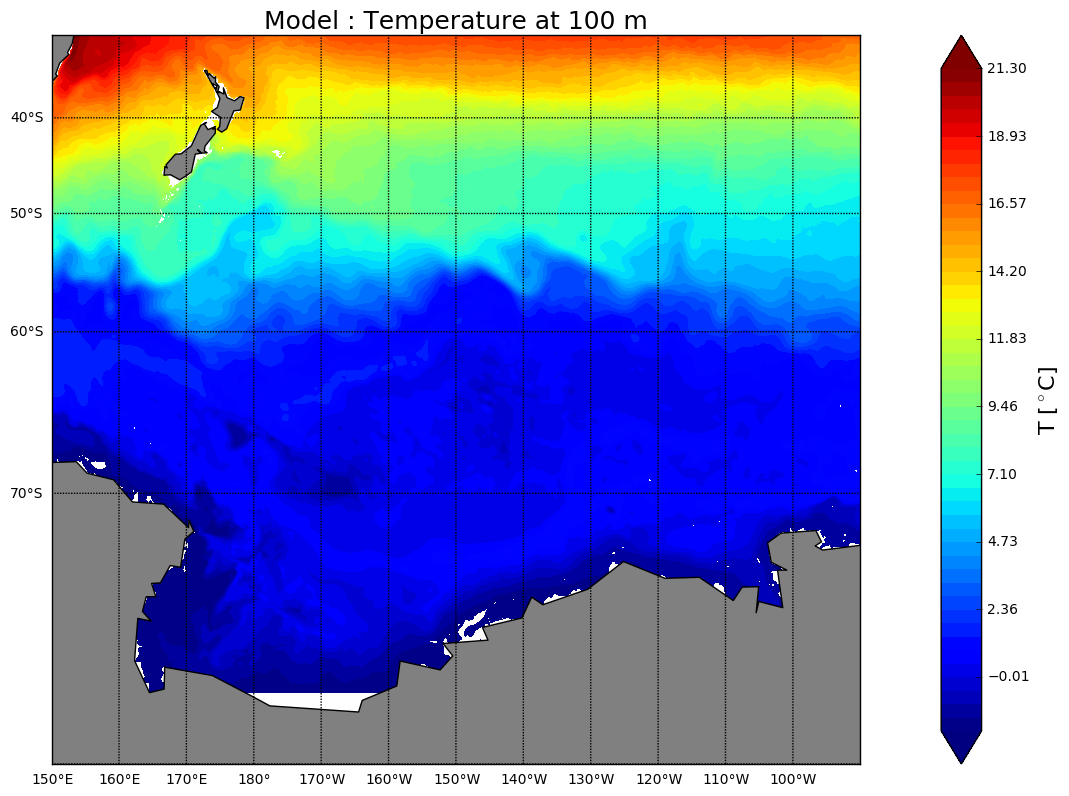

In [30]:
merc_map(np.linspace(-1.9,21.3,50), Lon, Lat, mean_Theta_100, 'Model : Temperature at 100 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta1_2_jup.png')

## 200 m deep

In [9]:
mean_Theta_200= (np.ma.mean(file1.variables['Theta'][19:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,39,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [10]:
pickle_save('mean_Theta_200_2', '/data/ebent/Bigger_domain/', mean_Theta_200)

('saved at : ', '/data/ebent/Bigger_domain/mean_Theta_200_2.npy')


In [82]:
print(mean_Theta_200.min(), mean_Theta_200.max(), np.mean(mean_Theta_200))

(-1.9026828190406606, 19.211881366713168, 4.8516915373078451)


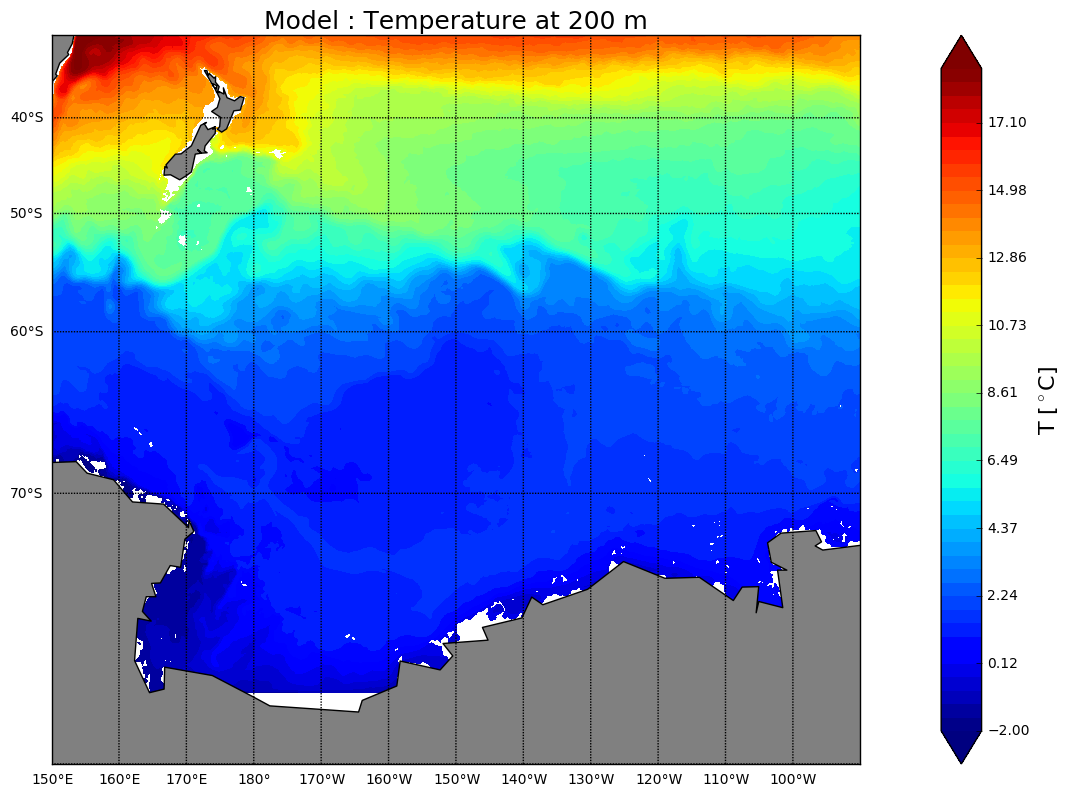

In [31]:
merc_map(np.linspace(-2.0,18.8,50), Lon, Lat, mean_Theta_200, 'Model : Temperature at 200 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta2_2_jup.png')

## 500 m 

In [13]:
mean_Theta_500= (np.ma.mean(file1.variables['Theta'][19:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:,59,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [14]:
pickle_save('mean_Theta_500_2', '/data/ebent/Bigger_domain/', mean_Theta_500)

('saved at : ', '/data/ebent/Bigger_domain/mean_Theta_500_2.npy')


In [21]:
print(mean_Theta_500.min(), mean_Theta_500.max(), np.mean(mean_Theta_500))

(-1.910933545980704, 12.179362911939805, 4.1362210506166779)


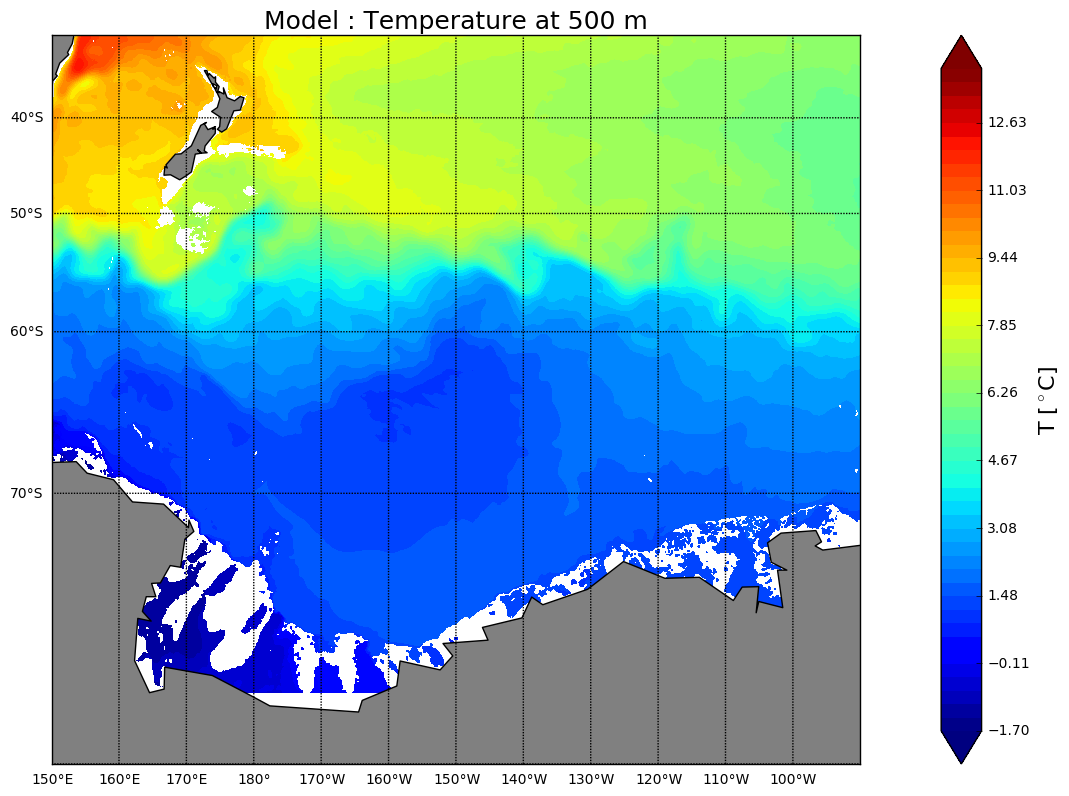

In [32]:
merc_map(np.linspace(-1.7,13.9,50), Lon, Lat, mean_Theta_500, 'Model : Temperature at 500 m', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'theta500_2_jup.png')

# DJF

In [33]:
mean_Theta_DJF= (np.ma.mean(file1.variables['Theta'][67:,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][index_DJF,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][index_DJF,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][index_DJF,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][index_DJF,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Theta'][:12,39,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [28]:
pickle_save('mean_Theta_30_DJF', '/data/ebent', mean_Theta_DJF)

('saved at : ', '/data/ebent/mean_Theta_30_DJF.npy')


In [32]:
pickle_save('mean_Theta_100_DJF', '/data/ebent', mean_Theta_DJF)

('saved at : ', '/data/ebent/mean_Theta_100_DJF.npy')


In [34]:
pickle_save('mean_Theta_200_DJF', '/data/ebent', mean_Theta_DJF)

('saved at : ', '/data/ebent/mean_Theta_200_DJF.npy')


***

In [22]:
mean_Theta_30_DJF = pickle_load('mean_Theta_30_DJF', '/data/ebent')
mean_Theta_100_DJF = pickle_load('mean_Theta_100_DJF', '/data/ebent')
mean_Theta_200_DJF = pickle_load('mean_Theta_200_DJF', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Theta_30_DJF.npy')
('loaded from : ', '/data/ebent/mean_Theta_100_DJF.npy')
('loaded from : ', '/data/ebent/mean_Theta_200_DJF.npy')


In [36]:
print(mean_Theta_30_DJF.min(), mean_Theta_30_DJF.max(), np.mean(mean_Theta_30_DJF))
print(mean_Theta_100_DJF.min(), mean_Theta_100_DJF.max(), np.mean(mean_Theta_100_DJF))
print(mean_Theta_200_DJF.min(), mean_Theta_200_DJF.max(), np.mean(mean_Theta_200_DJF))

(-1.9392891459994848, 25.963134853928178, 5.6099998231292805)
(-1.9162485908578939, 22.674275336442168, 4.6830607283407835)
(-1.9031828713637813, 19.320322125046342, 4.8290891546124524)


/usr/local/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


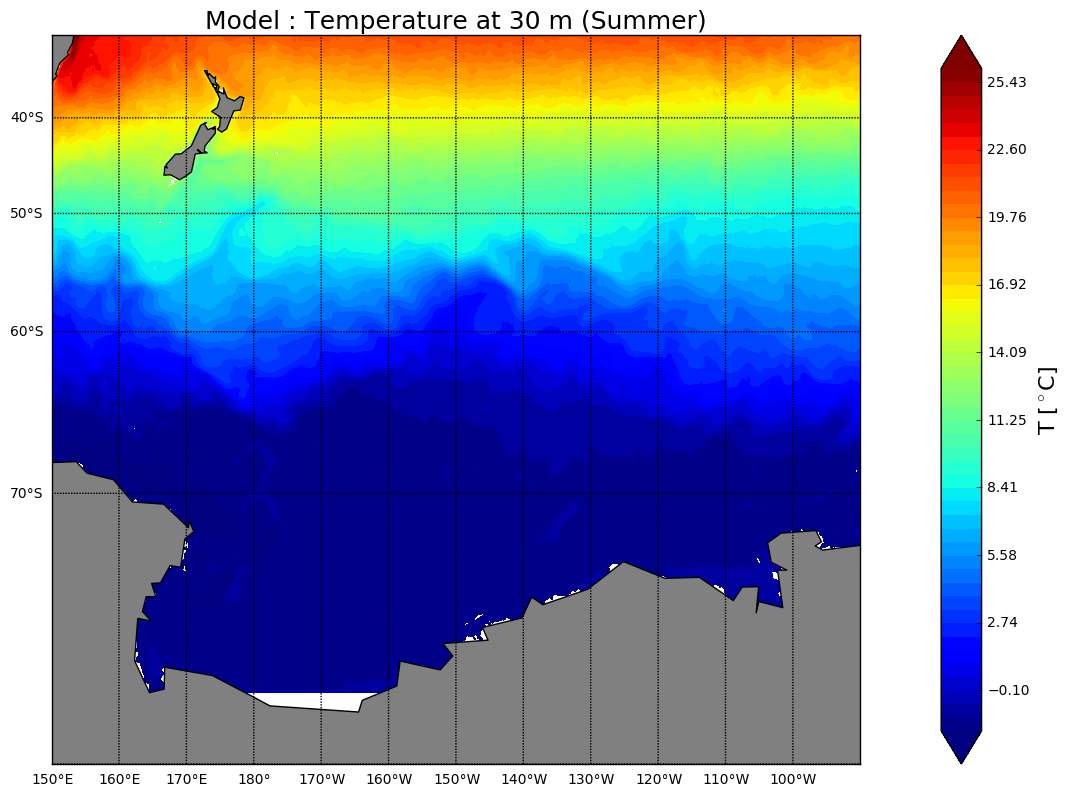

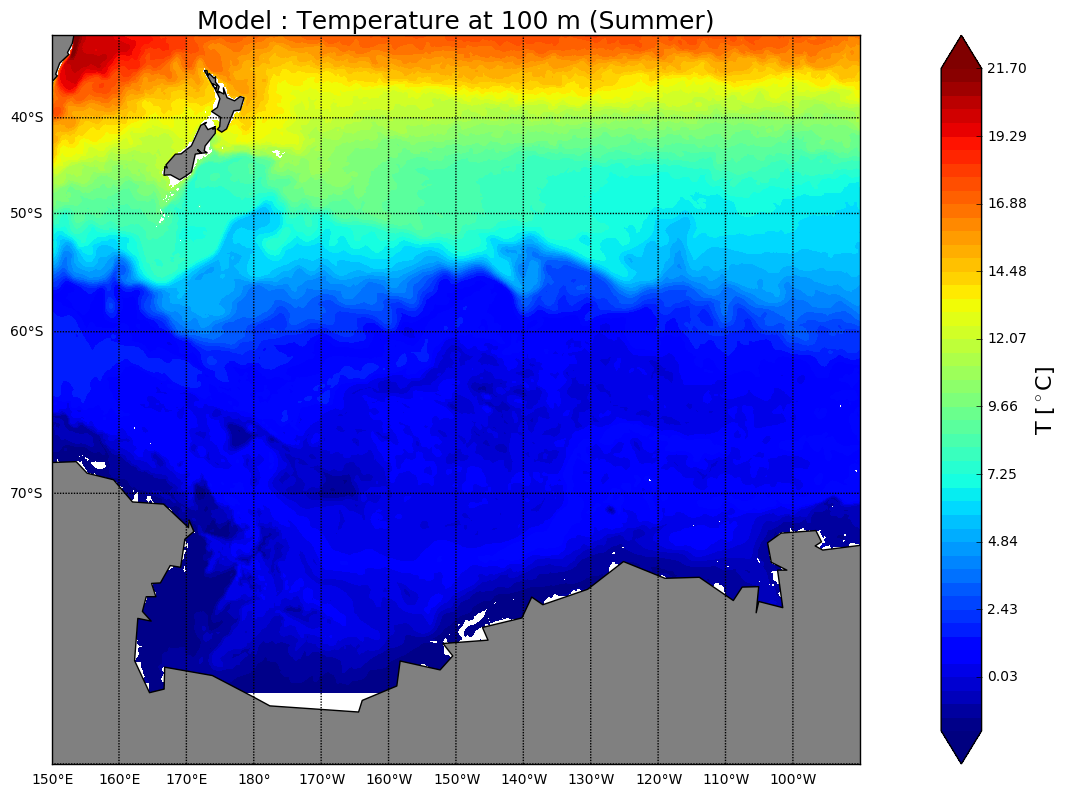

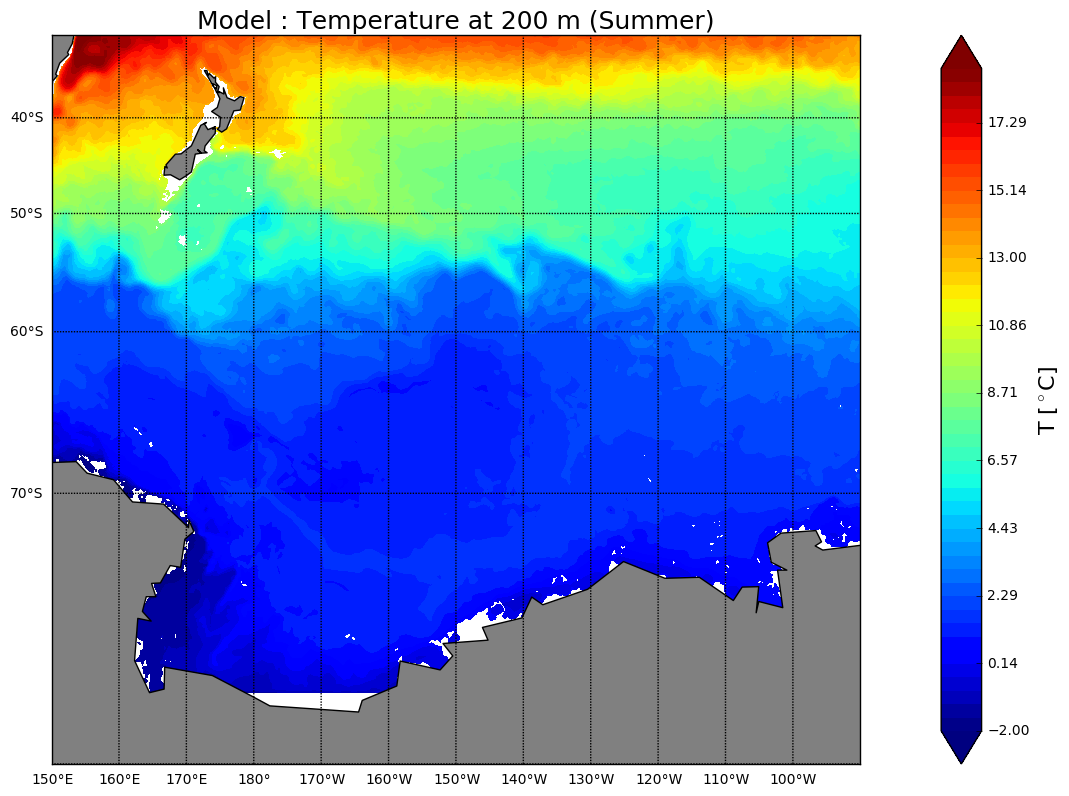

In [23]:
merc_map(np.linspace(-1.8,26,50), Lon, Lat, mean_Theta_30_DJF, 'Model : Temperature at 30 m (Summer)', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'Winter_T_30_2_jup.png')
merc_map(np.linspace(-1.9,21.7,50), Lon, Lat, mean_Theta_100_DJF, 'Model : Temperature at 100 m (Summer)', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'Winter_T_100_2_jup.png')
merc_map(np.linspace(-2,19,50), Lon, Lat, mean_Theta_200_DJF, 'Model : Temperature at 200 m (Summer)', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'Winter_T_200_2_jup.png')

# JJA

In [39]:
mean_Theta_JJA= (np.ma.mean(file1.variables['Theta'][index_JJA,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file2.variables['Theta'][index_JJA,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Theta'][index_JJA,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Theta'][index_JJA,39,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Theta'][index_JJA,39,lat_min:lat_max, lon_min:lon_max], axis=0))/5

In [30]:
pickle_save('mean_Theta_30_JJA', '/data/ebent', mean_Theta_JJA)

('saved at : ', '/data/ebent/mean_Theta_30_JJA.npy')


In [38]:
pickle_save('mean_Theta_100_JJA', '/data/ebent', mean_Theta_JJA)

('saved at : ', '/data/ebent/mean_Theta_100_JJA.npy')


In [40]:
pickle_save('mean_Theta_200_JJA', '/data/ebent', mean_Theta_JJA)

('saved at : ', '/data/ebent/mean_Theta_200_JJA.npy')


***

In [24]:
mean_Theta_30_JJA = pickle_load('mean_Theta_30_JJA', '/data/ebent')
mean_Theta_100_JJA = pickle_load('mean_Theta_100_JJA', '/data/ebent')
mean_Theta_200_JJA = pickle_load('mean_Theta_200_JJA', '/data/ebent')

('loaded from : ', '/data/ebent/mean_Theta_30_JJA.npy')
('loaded from : ', '/data/ebent/mean_Theta_100_JJA.npy')
('loaded from : ', '/data/ebent/mean_Theta_200_JJA.npy')


In [42]:
print(mean_Theta_30_JJA.min(), mean_Theta_30_JJA.max(), np.mean(mean_Theta_30_JJA))
print(mean_Theta_100_JJA.min(), mean_Theta_100_JJA.max(), np.mean(mean_Theta_100_JJA))
print(mean_Theta_200_JJA.min(), mean_Theta_200_JJA.max(), np.mean(mean_Theta_200_JJA))

(-1.9372584255118119, 22.447021785535309, 4.0739364195149301)
(-1.9137688385812861, 21.938672617862096, 4.7222748011529196)
(-1.9055943200462742, 18.988097040276777, 4.8619009545780045)


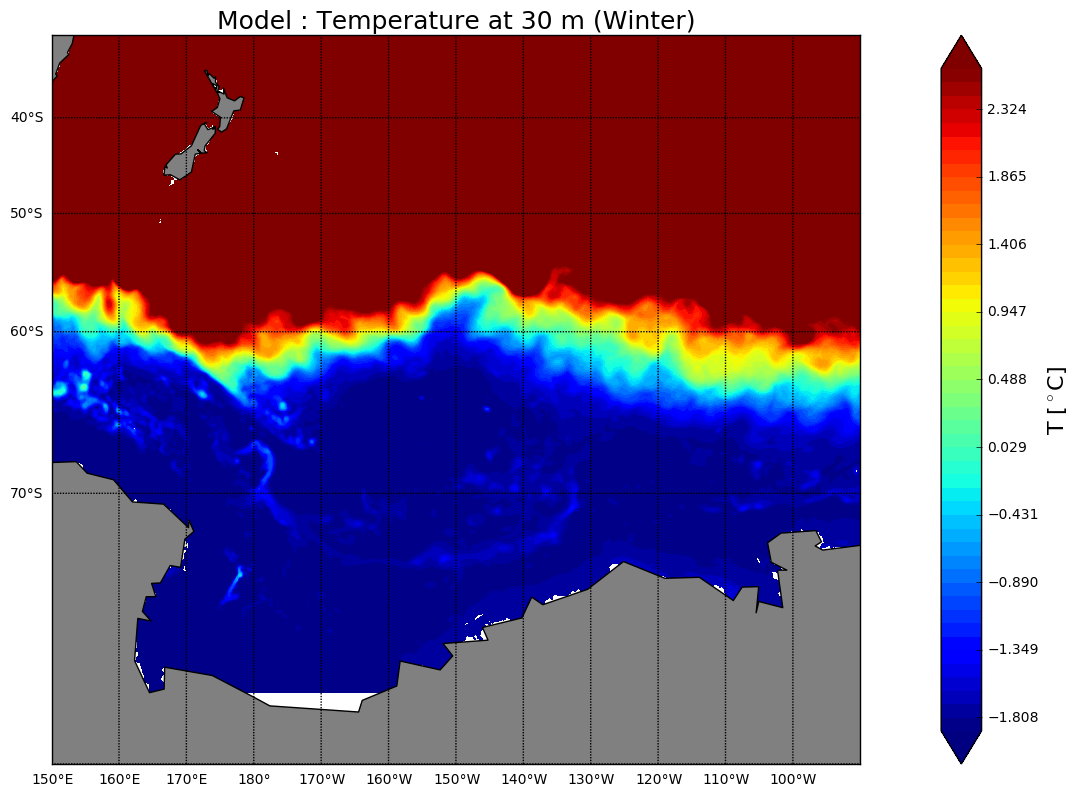

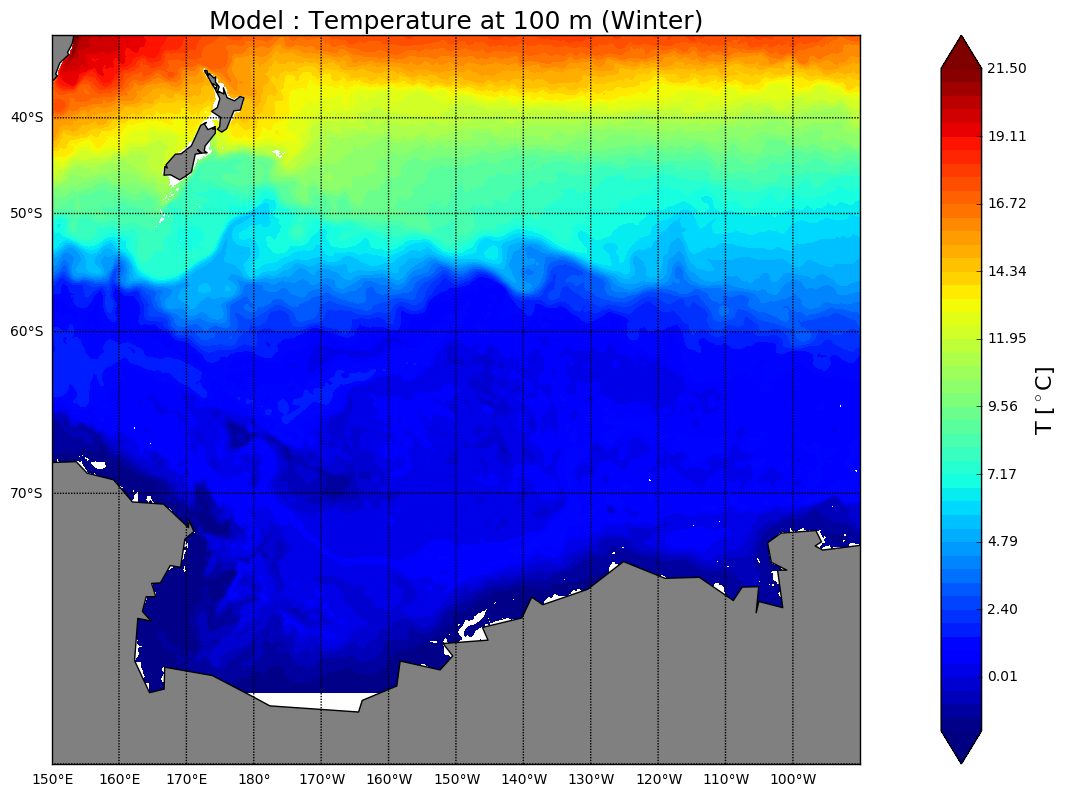

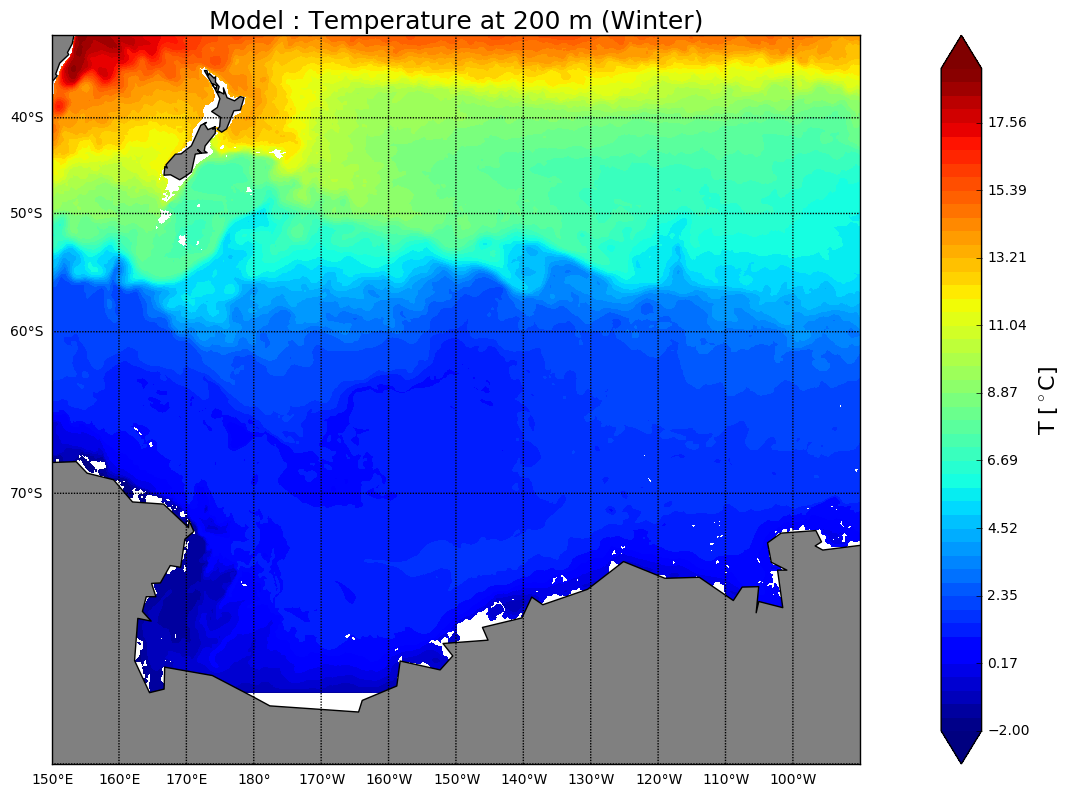

In [25]:
merc_map(np.linspace(-1.9,2.6,50), Lon, Lat, mean_Theta_30_JJA, 'Model : Temperature at 30 m (Winter)', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'Summer_T_30_2_jup.png')
merc_map(np.linspace(-1.9,21.5,50), Lon, Lat, mean_Theta_100_JJA, 'Model : Temperature at 100 m (Winter)', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'Summer_T_100_2_jup.png')
merc_map(np.linspace(-2,19.3,50), Lon, Lat, mean_Theta_200_JJA, 'Model : Temperature at 200 m (Winter)', 'T [$^\circ$C]', plt.cm.jet, plot_path_jup, 'Summer_T_200_2_jup.png')